[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/moshi4/pyCirclize/blob/main/docs/chord_diagram.ipynb)

In [1]:
# %pip install pycirclizely

## 1. Matrix Data

pyCirclize can plot a **Chord Diagram**([wiki](https://en.wikipedia.org/wiki/Chord_diagram_%28information_visualization%29)) from matrix data like [circlize](https://jokergoo.github.io/circlize_book/book/the-chorddiagram-function.html) or [Circos Table Viewer](http://mkweb.bcgsc.ca/tableviewer/).

### 1-1. Example1 (3 x 6)

This example uses the same matrix data as documented in [circlize](https://jokergoo.github.io/circlize_book/book/the-chorddiagram-function.html)

    E1  E2  E3  E4  E5  E6
S1   4  14  13  17   5   2
S2   7   1   6   8  12  15
S3   9  10   3  16  11  18


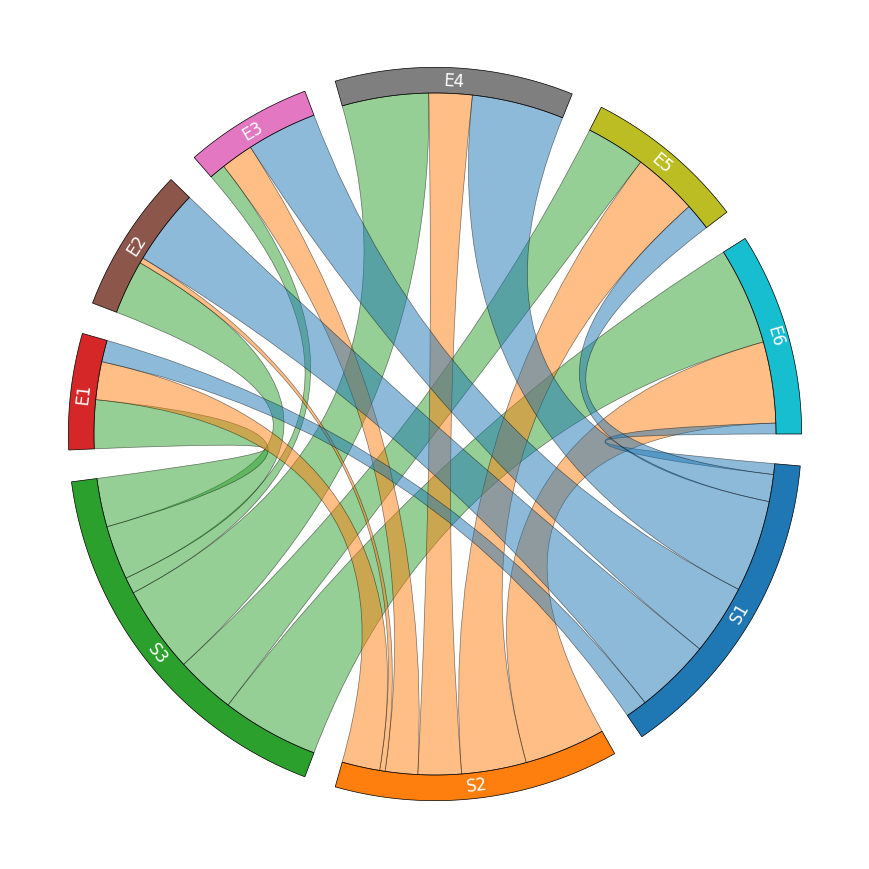

In [2]:
import pandas as pd

from pycirclizely import Circos

# Create matrix dataframe (3 x 6)
row_names = ["S1", "S2", "S3"]
col_names = ["E1", "E2", "E3", "E4", "E5", "E6"]
matrix_data = [
    [4, 14, 13, 17, 5, 2],
    [7, 1, 6, 8, 12, 15],
    [9, 10, 3, 16, 11, 18],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix_df,
    start=-265,
    end=95,
    space=5,
    r_lim=(93, 100),
    cmap="tab10",
    label_kws=dict(r=94, size=12, color="white"),
    link_kws=dict(ec="black", lw=0.5),
)

print(matrix_df)
fig = circos.plotfig()

### 1-2. Example2 (10 x 10)

This example uses the 10 x 10 matrix data randomly generated by [Circos Table Viewer](http://mkweb.bcgsc.ca/tableviewer/)

     A    B    C    D    E    F    G    H    I    J
A   51  115   60   17  120  126  115  179  127  114
B  108  138  165  170   85  221   75  107  203   79
C  108   54   72  123   84  117  106  114   50   27
D   62  134   28  185  199  179   74   94  116  108
E  211  114   49   55  202   97   10   52   99  111
F   87    6  101  117  124  171  110   14  175  164
G  167   99  109  143   98   42   95  163  134   78
H   88   83  136   71  122   20   38  264  225  115
I  145   82   87  123  121   55   80   32   50   12
J  122  109   84   94  133   75   71  115   60  210


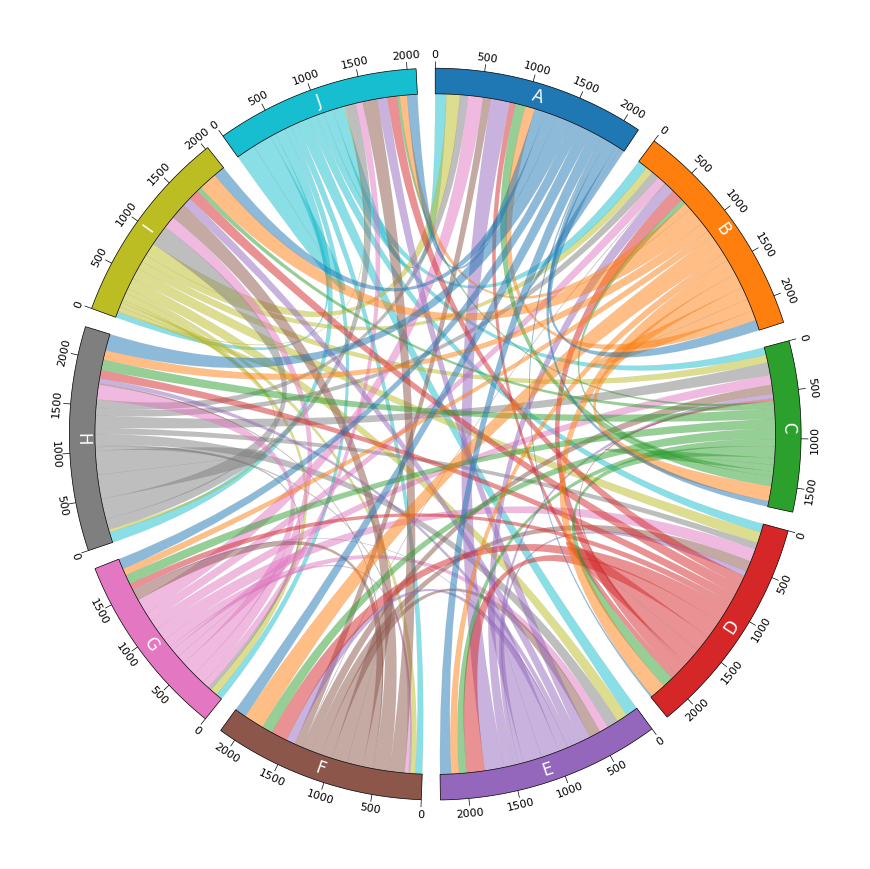

In [3]:
import pandas as pd

from pycirclizely import Circos

# Create matrix data (10 x 10)
row_names = list("ABCDEFGHIJ")
col_names = row_names
matrix_data = [
    [51, 115, 60, 17, 120, 126, 115, 179, 127, 114],
    [108, 138, 165, 170, 85, 221, 75, 107, 203, 79],
    [108, 54, 72, 123, 84, 117, 106, 114, 50, 27],
    [62, 134, 28, 185, 199, 179, 74, 94, 116, 108],
    [211, 114, 49, 55, 202, 97, 10, 52, 99, 111],
    [87, 6, 101, 117, 124, 171, 110, 14, 175, 164],
    [167, 99, 109, 143, 98, 42, 95, 163, 134, 78],
    [88, 83, 136, 71, 122, 20, 38, 264, 225, 115],
    [145, 82, 87, 123, 121, 55, 80, 32, 50, 12],
    [122, 109, 84, 94, 133, 75, 71, 115, 60, 210],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)

# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix_df,
    space=3,
    r_lim=(93, 100),
    cmap="tab10",
    ticks_interval=500,
    label_kws=dict(r=94, size=12, color="white"),
)

print(matrix_df)
fig = circos.plotfig()

### 1-3. Example3 (10 x 2)

This example uses the 10 x 2 matrix data randomly generated by [Circos Table Viewer](http://mkweb.bcgsc.ca/tableviewer/)

     K    L
A   83   79
B   90  118
C  165   81
D  121   77
E  187  197
F  177    8
G  141  127
H   29   27
I   95   82
J  107   39


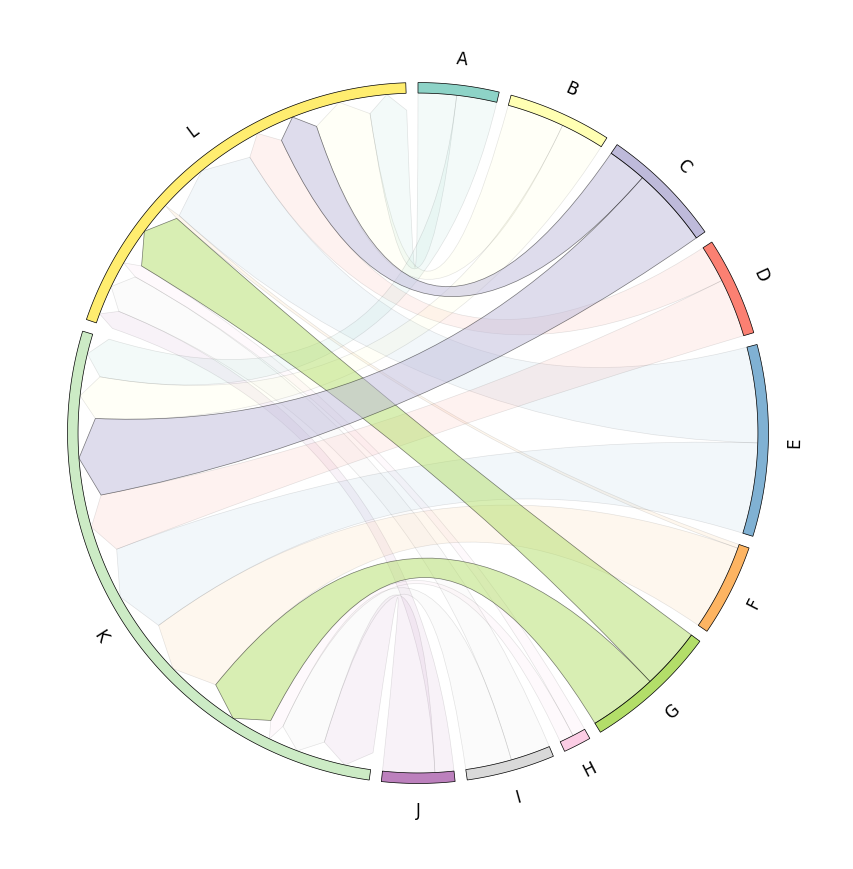

In [4]:
import pandas as pd

from pycirclizely import Circos

# Create matrix data (10 x 2)
row_names = list("ABCDEFGHIJ")
col_names = list("KL")
matrix_data = [
    [83, 79],
    [90, 118],
    [165, 81],
    [121, 77],
    [187, 197],
    [177, 8],
    [141, 127],
    [29, 27],
    [95, 82],
    [107, 39],
]
matrix_df = pd.DataFrame(matrix_data, index=row_names, columns=col_names)


# Define link_kws handler function to customize each link property
def link_kws_handler(from_label: str, to_label: str):
    if from_label in ("C", "G"):
        # Set alpha, zorder values higher than other links for highlighting
        return dict(alpha=0.5, zorder=1.0)
    else:
        return dict(alpha=0.1, zorder=0)


# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix_df,
    space=2,
    cmap="Set3",
    label_kws=dict(size=12),
    link_kws=dict(direction=1, ec="black", lw=0.5),
    link_kws_handler=link_kws_handler,
)

print(matrix_df)
fig = circos.plotfig()

## 2. From-To Table Data

pyCirclize can plot a Chord Diagram from `from-to table` data.

### 2-1. Example 1

from to  value
   A  B     10
   A  C      5
   A  D     15
   B  D      8
   C  D      6


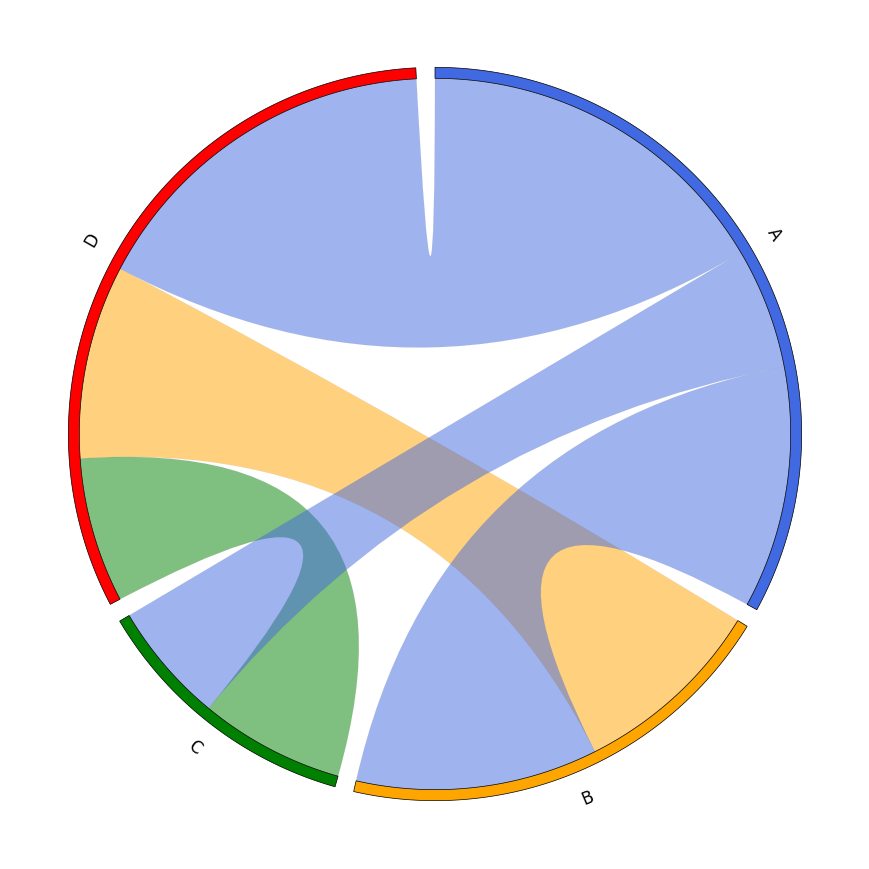

In [5]:
import pandas as pd

from pycirclizely import Circos
from pycirclizely.parser import Matrix

# Create from-to table dataframe & convert to matrix
fromto_table_df = pd.DataFrame(
    [
        ["A", "B", 10],
        ["A", "C", 5],
        ["A", "D", 15],
        ["B", "D", 8],
        ["C", "D", 6],
    ],
    columns=["from", "to", "value"],  # Column name is optional
)
matrix = Matrix.parse_fromto_table(fromto_table_df)

# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix,
    space=3,
    cmap=dict(A="royalblue", B="orange", C="green", D="red"),
    label_kws=dict(size=12),
)

print(fromto_table_df.to_string(index=False))
fig = circos.plotfig()

### 2-2. Example 2

from to  value
   A  B     10
   A  C      5
   A  D     15
   A  E     20
   A  F      3
   B  A      3
   B  G     15
   F  D     13
   F  E      2
   E  A     20
   E  D      6


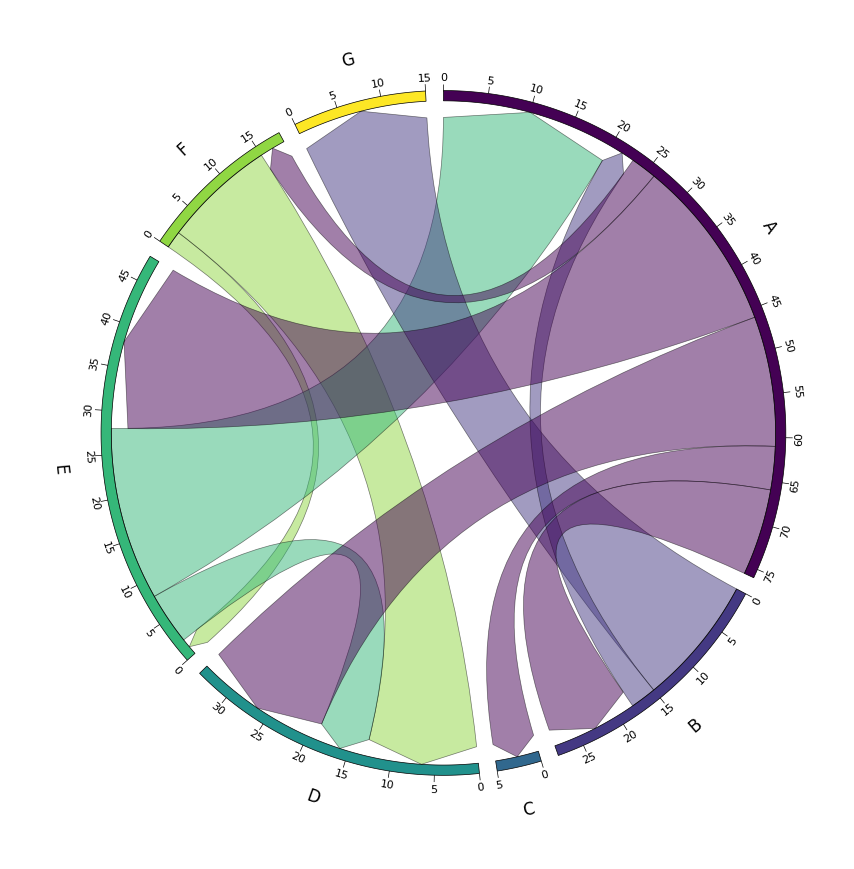

In [6]:
import pandas as pd

from pycirclizely import Circos
from pycirclizely.parser import Matrix

# Create from-to table dataframe & convert to matrix
fromto_table_df = pd.DataFrame(
    [
        ["A", "B", 10],
        ["A", "C", 5],
        ["A", "D", 15],
        ["A", "E", 20],
        ["A", "F", 3],
        ["B", "A", 3],
        ["B", "G", 15],
        ["F", "D", 13],
        ["F", "E", 2],
        ["E", "A", 20],
        ["E", "D", 6],
    ],
    columns=["from", "to", "value"],  # Column name is optional
)
matrix = Matrix.parse_fromto_table(fromto_table_df)

# Initialize Circos instance for chord diagram plot
circos = Circos.chord_diagram(
    matrix,
    space=3,
    cmap="viridis",
    ticks_interval=5,
    label_kws=dict(size=12, r=110),
    link_kws=dict(direction=1, ec="black", lw=0.5),
)

print(fromto_table_df.to_string(index=False))
fig = circos.plotfig()